In [3]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
genes = ["gene" + str(i) for i in range(1,101)]

In [7]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [16]:
data = pd.DataFrame(columns = [*wt, *ko], index= genes)

In [17]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] =  np.random.poisson(lam=rd.randrange(10,1000), size= 5)
    data.loc[gene,'ko1':'ko5'] =  np.random.poisson(lam=rd.randrange(10,1000), size= 5)

In [22]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,160,181,187,167,190,879,903,868,882,887
gene2,792,779,886,794,827,185,217,186,193,200
gene3,455,478,495,489,480,763,758,814,745,731
gene4,176,179,172,153,175,556,547,571,492,548
gene5,158,172,183,176,168,658,668,716,723,666


In [23]:
data.shape

(100, 10)

In [24]:
scaled_data = preprocessing.scale(data.T)


In [28]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data_2 = scaler.fit_transform(data.T)

In [29]:
pca = PCA()

In [30]:
pca.fit(scaled_data)

PCA()

In [31]:
pca_data = pca.transform(scaled_data)

In [33]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ["PC" + str(i) for i in range(1, len(per_var)+1)]

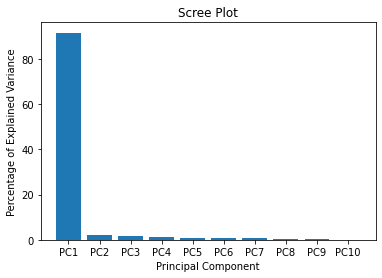

In [36]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label= labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [38]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns  = labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.413250,1.303535,-1.793420,-0.114083,-0.284549,-1.121985,-0.038720,0.690244,-0.936540,6.508190e-16
wt2,9.637566,1.192086,-0.499052,-0.709124,0.479289,-0.379969,-0.684657,0.017441,1.403854,1.866615e-15
wt3,9.471985,-0.966037,-1.258372,0.944114,-0.957918,1.915869,0.727438,-0.116660,0.160081,5.048509e-16
wt4,9.329224,-0.656184,0.952316,-0.408241,1.518095,-0.548442,1.283385,-0.909230,-0.292053,-2.381073e-16
wt5,10.017063,-0.833163,2.573247,0.234348,-0.748170,0.134731,-1.185768,0.343293,-0.334015,4.756057e-16


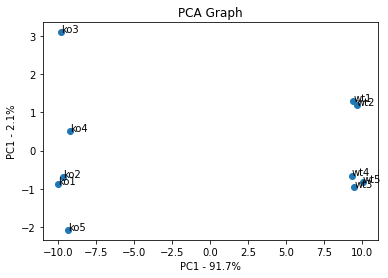

In [41]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Graph")
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC1 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [48]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
loading_scores[top_10_genes]

gene51   -0.104359
gene87   -0.104355
gene33    0.104340
gene54   -0.104335
gene76    0.104332
gene56   -0.104324
gene61    0.104315
gene8    -0.104309
gene34   -0.104305
gene18    0.104289
dtype: float64